In [14]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
import pandas as pd
import numpy as np
from collections import Counter
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole

In [2]:
# Load bioassay results
ba_df = pd.read_csv("AID_1030_datatable_all.csv")

# Load compound SMILES info
cs_df = pd.read_csv("AID_1030_compound_smiles.csv",sep='\t',header=0)

# Merge the two
full_df = ba_df.merge(cs_df,on='PUBCHEM_CID')

# Cleanup the compound ID column
full_df["PUBCHEM_CID"] = full_df["PUBCHEM_CID"].astype(int)
full_df["PUBCHEM_ACTIVITY_SCORE"] = full_df["PUBCHEM_ACTIVITY_SCORE"].astype(int)


/home/joe/anaconda3/envs/pubchem-sklearn/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (0,8,9,12,13,14,15,16,17,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
outcomes = full_df["PUBCHEM_ACTIVITY_OUTCOME"]
print(outcomes.describe())
print(outcomes.unique())

count       220365
unique           3
top       Inactive
freq        148299
Name: PUBCHEM_ACTIVITY_OUTCOME, dtype: object
['Inconclusive' 'Inactive' 'Active']


In [4]:
# Calculate the frequency of each of the outcomes
c = Counter(outcomes)
active_count = c["Active"]
inactive_count = c["Inactive"]
inconclusive_count = c["Inconclusive"]
print("Active: {}, Inactive: {}, Inconclusive: {}".format(active_count,inactive_count,inconclusive_count))

Active: 16112, Inactive: 148299, Inconclusive: 55954


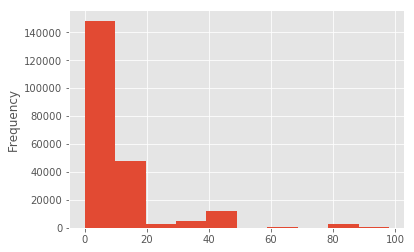

In [8]:
# Plot a histogram of activity scores
%matplotlib inline
full_df["PUBCHEM_ACTIVITY_SCORE"].plot.hist()

Example 1: CCOCCCNCC(=O)NC1=CC=C(C=C1)OC(F)(F)F.Cl, Example 2: COCCN1C(=NN=N1)CN2CCC(CC2)CC3=CC=CC=C3.Cl


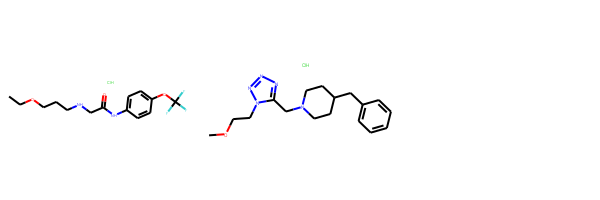

In [17]:
# Now, let's look at the column we'll be using to derive our features. This is the "smiles" column
smiles = full_df["Smiles"]
smile_1 = smiles[0]
smile_2 = smiles[1]
print("Example 1: {}, Example 2: {}".format(smile_1,smile_2))
mol_1 = Chem.MolFromSmiles(smile_1)
mol_2 = Chem.MolFromSmiles(smile_2)

Draw.MolsToGridImage([mol_1,mol_2])
# Let's print one of the molecule

In [10]:
smiles_lengths = pd.Series([len(s) for s in smiles])
smiles_lengths.describe()

count    220365.000000
mean         48.853248
std          13.989668
min           2.000000
25%          40.000000
50%          48.000000
75%          56.000000
max         594.000000
dtype: float64